In [3]:
from PIL import Image
import os

path = "\\myData"

i=0
for r, d, f in os.walk(path):
    for file in f:
        if file.endswith('.png'):
            pat=os.path.join(r, file)
            with Image.open(pat) as im:
                if im.size!=(32, 32):
                    im=im.resize((32, 32),Image.LANCZOS)
                im.save(pat.replace(".png",".jpg"))
            os.remove(pat)
            i+=1
            print(i,end='\r')
        elif file.endswith('.jpg'):
            pat=os.path.join(r, file)
            with Image.open(pat) as im:
                if im.size!=(32, 32):
                    im=im.resize((32, 32),Image.LANCZOS)
                    im.save(pat)
                    i+=1
                    print(i,end='\r')



In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt


In [2]:
# pour eviter de load toutes les images 
data = np.load("traffic_signs_32x32.npz")
images = data["images"]
labels = data["labels"]

In [3]:
images = np.array(images)
labels = np.array(labels)

X = images.reshape(images.shape[0], -1)
y = labels

print("X shape:", X.shape)



X shape: (73139, 3072)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (58511, 3072) Test: (14628, 3072)


In [12]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


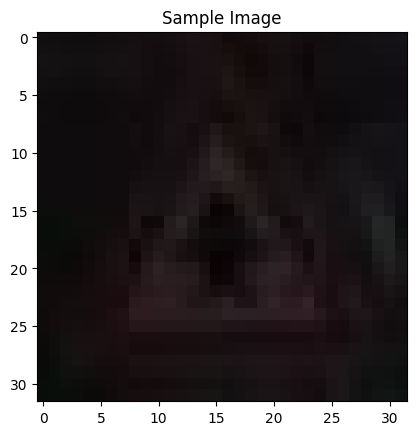

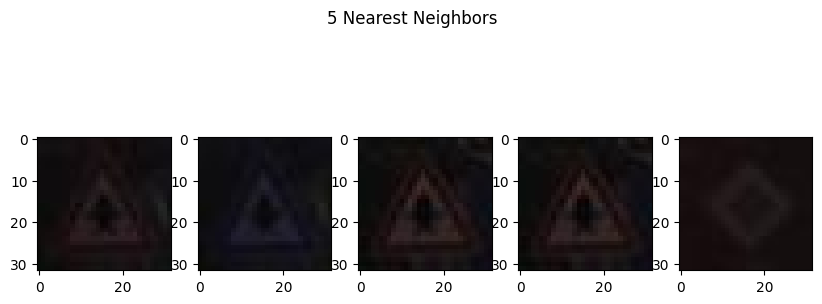

In [13]:
sample_index = 10
sample_image = X_test[sample_index].reshape(1, -1)

neighbors_indices = knn.kneighbors(sample_image, n_neighbors=n_neighbors, return_distance=False)
plt.imshow(sample_image.reshape(32, 32, 3), cmap=plt.cm.gray_r)
plt.title("Sample Image")
plt.show()


fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, neighbor_idx in zip(axes, neighbors_indices[0]):
    ax.imshow(X_train[neighbor_idx].reshape(32, 32, 3), cmap=plt.cm.gray_r)
plt.suptitle("5 Nearest Neighbors")
plt.show()


In [9]:

knn_y_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"accuracy pour k={n_neighbors}", knn_accuracy)


Accuracy of the k-NN model with k=5 0.9224774405250205


In [14]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("k-NN Accuracy for different neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()